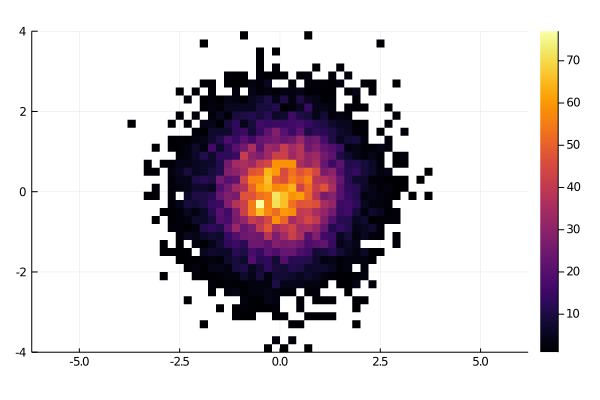

In [2]:
using Plots
r = randn(10^4,2)
xbins = 50; ybins=50
plot(r[:,1],r[:,2], seriestype=:histogram2d, bins=(xbins,ybins), aspect_ratio=1)

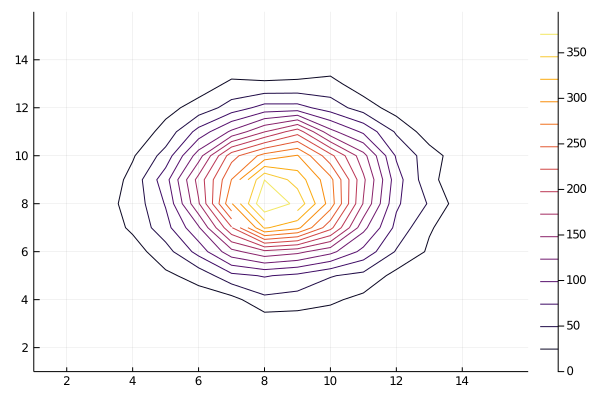

In [5]:
using StatsBase
h = fit(Histogram, (r[:,1], r[:,2]))
contour(h.weights)